# The Sound of Music

In this activity you will use features of music to predict its geographic origin (as represented in longitude and latitude coordinates.

## The Dataset

The dataset contains `68` encoded features of music composition (columns from `0` to `67`) from a music streaming service. The last two columns of the dataset (columns `68` and `69`) are the geographical coordinates where the song was played.

In [32]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [33]:
# Upload data to Colab
#from google.colab import files

#csv_file = files.upload()

In [34]:
# Read in data
data = Path("..\Resources\music.csv")
print(data)

..\Resources\music.csv


In [35]:

df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [36]:
# Create the features set (X) and the target set (y)
X = df.iloc[:, 0:68].values
y = df.iloc[:, 68:70].values

In [37]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [45]:
# Create a shallow, 1 hidden layer, neural network

number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()
# Hidden layer

nn.add(Dense(units=8, input_dim=X.shape[1],activation="relu"))

nn.add(Dense(units=2, activation="linear"))

In [46]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=800)

Epoch 1/800
24/24 [==============================] - 1s 11ms/step - loss: 2579.9861 - mse: 2579.9861 - val_loss: 2321.2739 - val_mse: 2321.2739
Epoch 2/800
24/24 [==============================] - 0s 3ms/step - loss: 2548.9797 - mse: 2548.9797 - val_loss: 2295.6165 - val_mse: 2295.6165
Epoch 3/800
24/24 [==============================] - 0s 3ms/step - loss: 2514.7913 - mse: 2514.7913 - val_loss: 2267.0457 - val_mse: 2267.0457
Epoch 4/800
24/24 [==============================] - 0s 3ms/step - loss: 2476.8337 - mse: 2476.8337 - val_loss: 2235.8584 - val_mse: 2235.8584
Epoch 5/800
24/24 [==============================] - 0s 3ms/step - loss: 2434.1279 - mse: 2434.1279 - val_loss: 2201.8750 - val_mse: 2201.8750
Epoch 6/800
24/24 [==============================] - 0s 3ms/step - loss: 2387.5745 - mse: 2387.5745 - val_loss: 2167.0557 - val_mse: 2167.0557
Epoch 7/800
24/24 [==============================] - 0s 3ms/step - loss: 2340.9080 - mse: 2340.9080 - val_loss: 2129.1802 - val_mse: 2129.180

In [51]:
# Define the model - deep neural network with two layers
nn = Sequential()

nn.add(Dense(units=8, input_dim=X.shape[1],activation="relu"))
nn.add(Dense(units=2, input_dim=X.shape[1],activation="relu"))

In [52]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=800)

Epoch 1/800
24/24 [==============================] - 1s 9ms/step - loss: 2572.9375 - mse: 2572.9375 - val_loss: 2327.6101 - val_mse: 2327.6101
Epoch 2/800
24/24 [==============================] - 0s 2ms/step - loss: 2550.1750 - mse: 2550.1750 - val_loss: 2309.7744 - val_mse: 2309.7744
Epoch 3/800
24/24 [==============================] - 0s 3ms/step - loss: 2523.8708 - mse: 2523.8708 - val_loss: 2287.9211 - val_mse: 2287.9211
Epoch 4/800
24/24 [==============================] - 0s 3ms/step - loss: 2493.6531 - mse: 2493.6531 - val_loss: 2263.6951 - val_mse: 2263.6951
Epoch 5/800
24/24 [==============================] - 0s 3ms/step - loss: 2460.9668 - mse: 2460.9668 - val_loss: 2237.0947 - val_mse: 2237.0947
Epoch 6/800
24/24 [==============================] - 0s 3ms/step - loss: 2424.0564 - mse: 2424.0564 - val_loss: 2207.5449 - val_mse: 2207.5449
Epoch 7/800
24/24 [==============================] - 0s 3ms/step - loss: 2382.6846 - mse: 2382.6846 - val_loss: 2173.7717 - val_mse: 2173.7717

# Evaluate the models

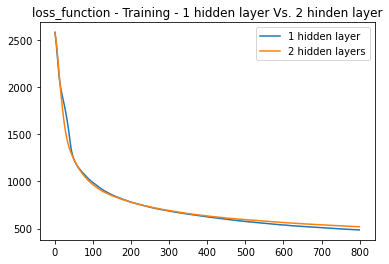

In [53]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

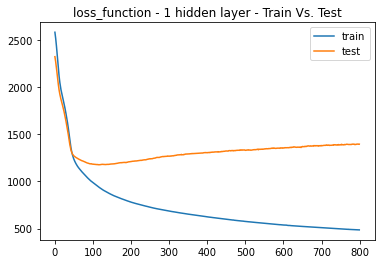

In [54]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

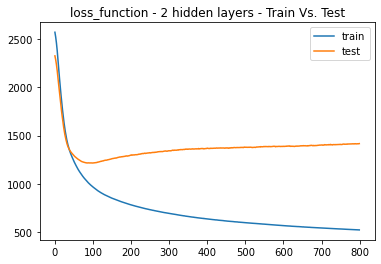

In [55]:
# Plot train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()